# Exploratório


In [1]:
import pandas
import glob
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
mpl.rcParams['figure.figsize'] = [8.0, 8.0]
%matplotlib inline

FOLDER = 'Parseados/'

In [2]:
anos = [2018,2016,2014,2012,2010,2008,2006,2004,2002]
candidatos = {x: pandas.read_csv(os.path.join(FOLDER,'Candidatos_{}.csv.gz'.format(x))) for x in anos}
candidatos = pandas.concat(candidatos.values())

/home/tiagobbatalhao/virtualenvs/DataScience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/home/tiagobbatalhao/virtualenvs/DataScience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
indices = [
    candidatos.Eleicao_ano,
    candidatos.Cargo,    
]
por_genero = pandas.crosstab(indices, candidatos.Candidato_genero)
por_genero['Frac_H'] = por_genero[2] / (por_genero[2]+por_genero[4])
por_genero['Frac_M'] = por_genero[4] / (por_genero[2]+por_genero[4])


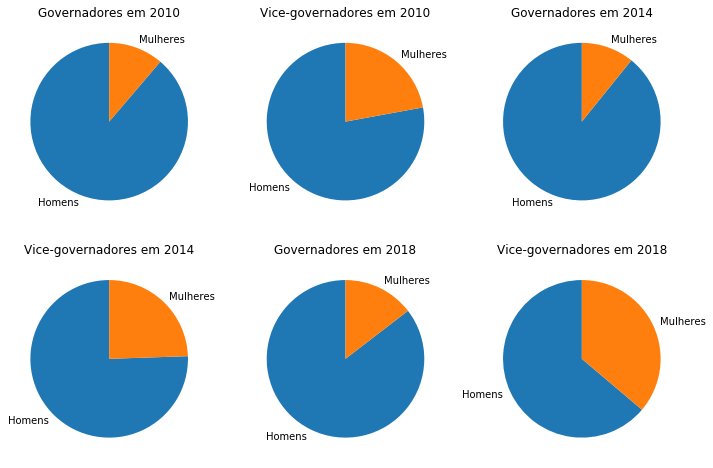

In [4]:
anos = [2010,2014,2018]
fig = plt.figure(figsize=(4*len(anos),8))
for i,ano in enumerate(anos):
    ax = fig.add_subplot(2,len(anos),2*i+1,aspect='equal')
    ax.pie(
        por_genero.loc[(ano,3),(2,4)].values,
        labels=['Homens','Mulheres'],
        startangle=90,
    )
    ax.set_title(f'Governadores em {ano}')
    ax = fig.add_subplot(2,len(anos),2*i+2,aspect='equal')
    ax.pie(
        por_genero.loc[(ano,4),(2,4)].values,
        labels=['Homens','Mulheres'],
        startangle=90,
    )
    ax.set_title(f'Vice-governadores em {ano}')

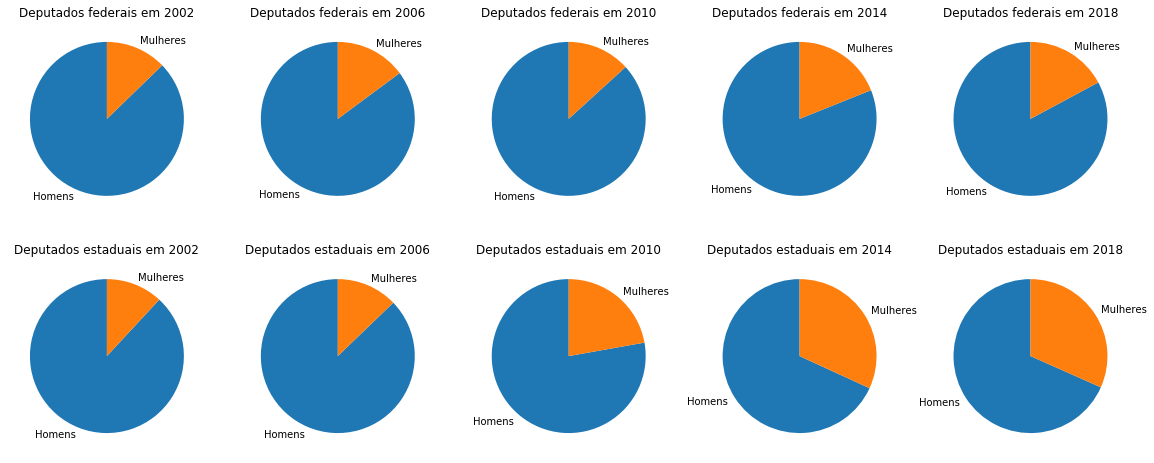

In [5]:
anos = [2002,2006,2010,2014,2018]
fig = plt.figure(figsize=(4*len(anos),8))
for i,ano in enumerate(anos):
    ax = fig.add_subplot(2,len(anos),i+1,aspect='equal')
    ax.pie(
        por_genero.loc[(ano,5),(2,4)].values,
        labels=['Homens','Mulheres'],
        startangle=90,
    )
    ax.set_title(f'Deputados federais em {ano}')
    ax = fig.add_subplot(2,len(anos),i+1+len(anos),aspect='equal')
    ax.pie(
        por_genero.loc[(ano,6),(2,4)].values,
        labels=['Homens','Mulheres'],
        startangle=90,
    )
    ax.set_title(f'Deputados estaduais em {ano}')

In [6]:
index = (candidatos['Eleicao_ano']==2018)&(candidatos['Cargo'].isin([6,7,8]))
this = candidatos[index]
indices = [
    this.Regiao_UE,
    this.Cargo,    
    this.Legenda_composicao,
]
visao_coligacao = pandas.crosstab(indices, this.Candidato_genero)
visao_coligacao['Frac_H'] = visao_coligacao[2] / (visao_coligacao[2]+visao_coligacao[4])
visao_coligacao['Frac_M'] = visao_coligacao[4] / (visao_coligacao[2]+visao_coligacao[4])

In [7]:
index = (candidatos['Eleicao_ano']==2018)&(candidatos['Cargo'].isin([6,7,8]))
this = candidatos[index]
indices = [
    this.Regiao_UE,
    this.Cargo,    
    this.Partido,
]
visao_partido = pandas.crosstab(indices, this.Candidato_genero)
visao_partido['Frac_H'] = visao_partido[2] / (visao_partido[2]+visao_partido[4])
visao_partido['Frac_M'] = visao_partido[4] / (visao_partido[2]+visao_partido[4])

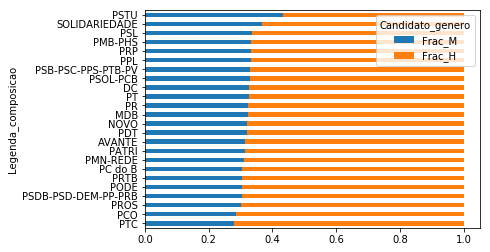

In [23]:
df = visao_coligacao[['Frac_M','Frac_H']].loc['SP',7].sort_values(by='Frac_M')
df.plot.barh(
    stacked=True,
)

/home/tiagobbatalhao/virtualenvs/DataScience/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


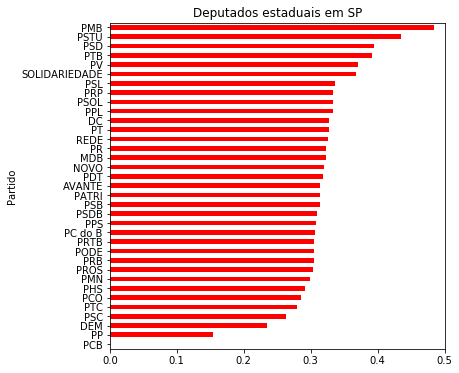

In [9]:
df = visao_partido[['Frac_M']].loc['SP',7].sort_values(by='Frac_M')
df.plot.barh(
    stacked=True,
    figsize=(6,6),
    title='Deputados estaduais em SP',
    legend=False,
    colors=['r','b'],
    xlim=(0,0.5),
)

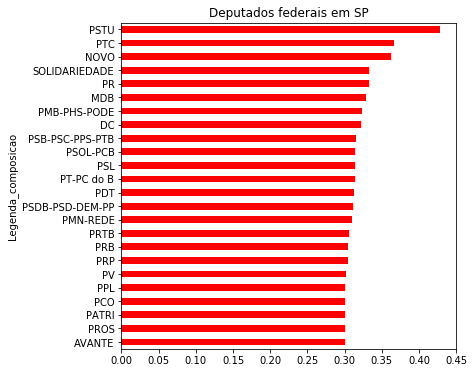

In [10]:
db = visao_coligacao
estado = 'SP'
cargo = ('estaduais', 7)
cargo = ('federais', 6)
df = db.loc[estado,cargo[1]].sort_values(by='Frac_M')[['Frac_M']]
df.plot.barh(
    stacked=True,
    figsize=(6,6),
    title=f'Deputados {cargo[0]} em {estado}',
    legend=False,
    color=['r','b'],
);

In [11]:
index = (candidatos['Cargo'].isin([6,7,8,13])) & (candidatos['Regiao_UE'].isin(['PI']))
this = candidatos[index]
indices = [
    this.Cargo,    
    this.Eleicao_ano,
]
df = pandas.crosstab(indices, this.Candidato_genero)
df['Frac_H'] = df[2] / (df[2]+df[4])
df['Frac_M'] = df[4] / (df[2]+df[4])
visao_ano = df

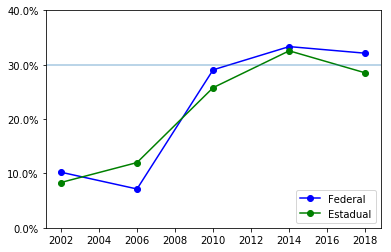

In [12]:
fig, ax = plt.subplots()
anos_FE = [2002,2006,2010,2014,2018]
try:
    vals_F = visao_ano.loc[(6,)]['Frac_M']
    vals_E = visao_ano.loc[(7,)]['Frac_M']
    ax.plot(anos_FE, vals_F, 'bo-', label='Federal')
    ax.plot(anos_FE, vals_E, 'go-', label='Estadual')
except:
    pass
anos_V = [2004,2008,2012,2016]
try:
    vals_V = visao_ano.loc[(13,)]['Frac_M']
    ax.plot(anos_V, vals_V, 'ro-', label='Vereador')
except KeyError:
    pass
ax.set_xticks(anos_V+anos_FE);
ax.set_ylim(0,0.4)
ax.set_yticks([round(0.1*x,2) for x in range(5)])
ax.set_yticklabels([str(round(x*100,0))+'%' for x in ax.get_yticks()])
ax.axhline(0.3, alpha=0.4)
ax.legend(loc='lower right')

In [13]:
visao_ano

Candidato_genero     2   4    Frac_H    Frac_M
Cargo Eleicao_ano                             
6     2002          79   9  0.897727  0.102273
      2006          91   7  0.928571  0.071429
      2010          83  34  0.709402  0.290598
      2014          74  37  0.666667  0.333333
      2018          93  44  0.678832  0.321168
7     2002         187  17  0.916667  0.083333
      2006         176  24  0.880000  0.120000
      2010         167  58  0.742222  0.257778
      2014         174  84  0.674419  0.325581
      2018         148  59  0.714976  0.285024

In [14]:
def ceil(x):
    if abs(x-round(x))<1e-6:
        return int(round(x))
    return math.ceil(x)
visao_coligacao['Mulheres_min'] = visao_coligacao[2].apply(lambda x: x*0.3/(1-0.3))
visao_coligacao['Mulheres_extras'] = visao_coligacao.apply(
    lambda x: x[4] - ceil(x[2]*0.3/0.7),
    axis=1
)

524
25.0


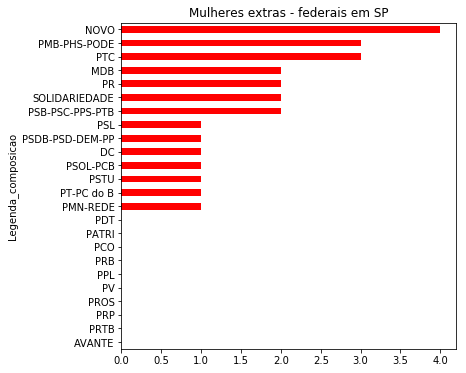

In [15]:
df = visao_coligacao.loc[('SP',6)].sort_values(by='Mulheres_extras', ascending=True)
print(sum(df[4]))
print(sum(df['Mulheres_extras']))
df[['Mulheres_extras']].plot.barh(
    stacked=True,
    figsize=(6,6),
    title=f'Mulheres extras - federais em SP',
    legend=False,
    color=['r','b'],
);

747
30.0


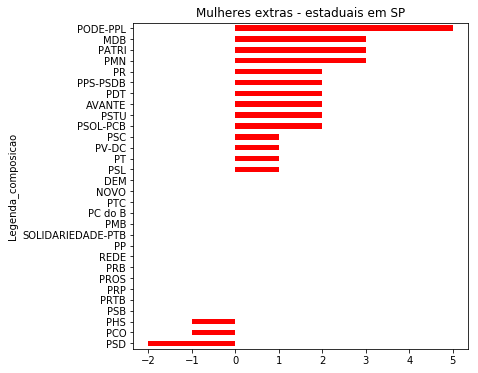

In [20]:
df = visao_coligacao.loc[('RJ',7)].sort_values(by='Mulheres_extras', ascending=True)
print(sum(df[4]))
print(sum(df['Mulheres_extras'].apply(lambda x: max(x,0))))
df[['Mulheres_extras']].plot.barh(
    stacked=True,
    figsize=(6,6),
    title=f'Mulheres extras - estaduais em SP',
    legend=False,
    color=['r','b'],
);

2626
121.0


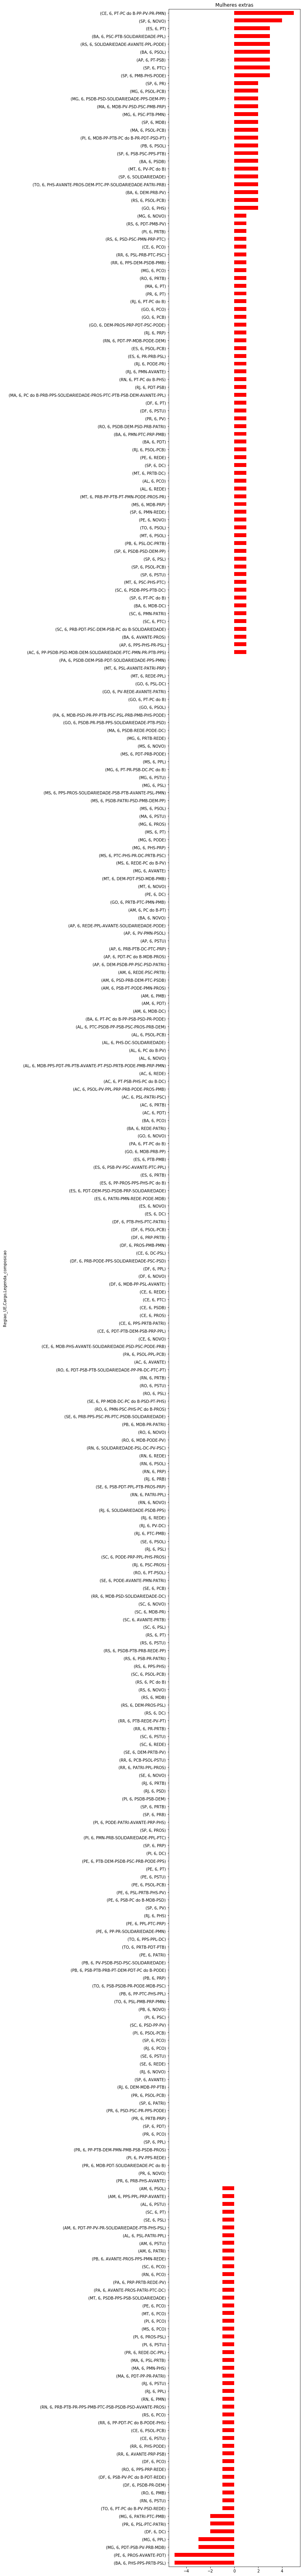

In [17]:
df = visao_coligacao.loc[(slice(None),6),:].sort_values(by='Mulheres_extras', ascending=True)
print(sum(df[4]))
print(sum(df['Mulheres_extras'].apply(lambda x: max(x,0))))
df[['Mulheres_extras']].plot.barh(
    stacked=True,
    title=f'Mulheres extras',
    figsize=(6,120),
    legend=False,
    color=['r','b'],
);

5393
263.0


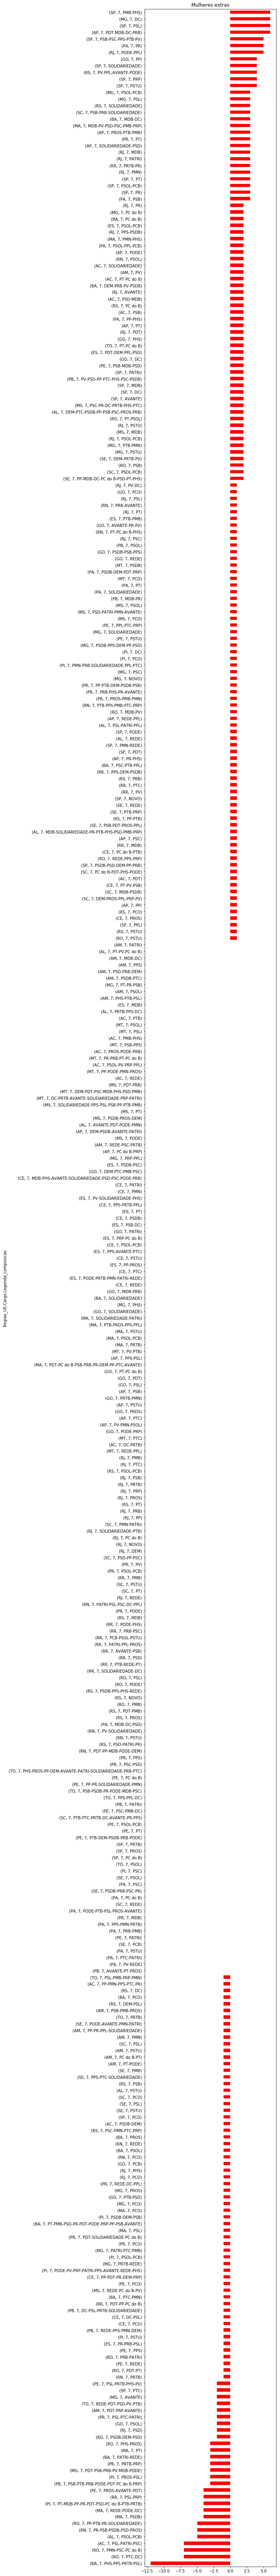

In [18]:
df = visao_coligacao.loc[(slice(None),7),:].sort_values(by='Mulheres_extras', ascending=True)
print(sum(df[4]))
print(sum(df['Mulheres_extras'].apply(lambda x: max(x,0))))
df[['Mulheres_extras']].plot.barh(
    stacked=True,
    title=f'Mulheres extras',
    figsize=(6,120),
    legend=False,
    color=['r','b'],
);